# CA2 Part1: PCA based data distribution visualization

In [1]:
import os
import sys
import cv2
import json
import numpy as np
from scipy import linalg
%matplotlib inline
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def pca(data, num_feat = None):
    # input protect
    if num_feat == None:
        [row,col] = data.shape
        num_feat = col
    # remove the average
    avg = np.mean(data,axis=0) 
    re_data = data - avg
    # calculate covariance
    cov_data = np.cov(re_data,rowvar=0)  
    # calculate eigenvalue
    eig_val, eig_vect = linalg.eig(np.mat(cov_data)) 
    # sort eigenvalue index form max to min
    eig_sorted = np.argsort(-eig_val)  
    
    # select component with contribution over 0.95
    if num_feat == -1:
        sum_eig = np.sum(eig_val)
        ratio = 0
        num_feat += 1
        while(ratio < 0.95):
            num_feat += 1
            ratio = np.sum(eig_val[0:num_feat])/sum_eig
            
    eig_selected = eig_sorted[0:num_feat]  
    # reshape the selected eigenvalue's matrix
    P = eig_vect[:,eig_selected] 
    # calculate reduced dimentional data
    re_dim = np.dot(re_data,P)  
    # transform data to new dimentionality
    trans_data = np.dot(re_dim,P.T) + avg  
    return re_dim, P

In [3]:
# load current directory
cur_dir = os.path.dirname(os.path.abspath("CA2_Part1.ipynb"))
# PIE directory
PIE_dir = cur_dir + '/PIE'
# load json folder
json_dir = PIE_dir + '/json'
datanames = os.listdir(json_dir)
jsonfile = open(json_dir+'/'+datanames[0])
img = json.load(jsonfile)

In [4]:
# training image class
class Ti:
    def __init__(self):
        self.img = [] # pixel values
        self.feature = [] # feature after PCA 
        self.id = 0 # -1 belongs to me
        

In [5]:
# generate training data
# collect all traning set data first
# load current directory
cur_dir = os.path.dirname(os.path.abspath("CA2_Part1.ipynb"))
# PIE directory
PIE_dir = cur_dir + '/PIE'
# load json folder
json_dir = PIE_dir + '/json'
# read json files' name
datanames = os.listdir(json_dir)
datanames.remove('Me')
datanames.remove('.DS_Store')

# load training data
train_img = []
for person in datanames:
    jsonfile = open(json_dir+'/'+person)
    img = json.load(jsonfile)

    # store the image information in class
    for im in img: 
        sample = Ti()
        sample.img = im
        sample.id = int(person)
        train_img.append(sample)
        
####
# load my photo data set
me_img = []
jsonfile = open(json_dir+'/Me')
img = json.load(jsonfile)

# store the image information in class
for im in img: 
    sample = Ti()
    sample.img = im
    sample.id = int(person)
    me_img.append(sample)

In [6]:
# get 500 index randomly
ran_num = 500
train_set = random.sample(train_img,ran_num)

# get 10 index randomly in my photos
ran_num = 10
me_set = random.sample(me_img,ran_num)

# generate feature matrix
feature = np.zeros([len(train_set)+len(me_set),1024])
for i in range(0,len(train_set)):
    sample = train_set[i]
    img = np.array(sample.img)
    img = img.reshape(1,-1)
    feature[i,:] = img

for i in range(0,len(me_set)):
    sample = me_set[i]
    img = np.array(sample.img)
    img = img.reshape(1,-1)
    feature[i+len(train_set),:] = img


In [7]:
# PCA
# number of dimention
num_di = 2
de_feat,new_data = pca(feature,num_di)
de_feat = de_feat.real

In [8]:
# save the decreased dimentional feature
for i in range(0,len(train_set)):
    feat = de_feat[i,:]
    train_set[i].feature = feat

for i in range(0,len(me_set)):
    feat = de_feat[i+len(train_set),:]
    me_set[i].feature = feat

In [9]:
def feat_plot2d(de_feat):
    plt.figure( figsize=(8,8) )
    plt.scatter(de_feat[0:500,0],de_feat[0:500,1],c = 'k',marker = '.')
    plt.scatter(de_feat[500:,0],de_feat[500:,1],c = 'r',marker = 'x')
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title("PCA visualization in 2D")
    plt.show()

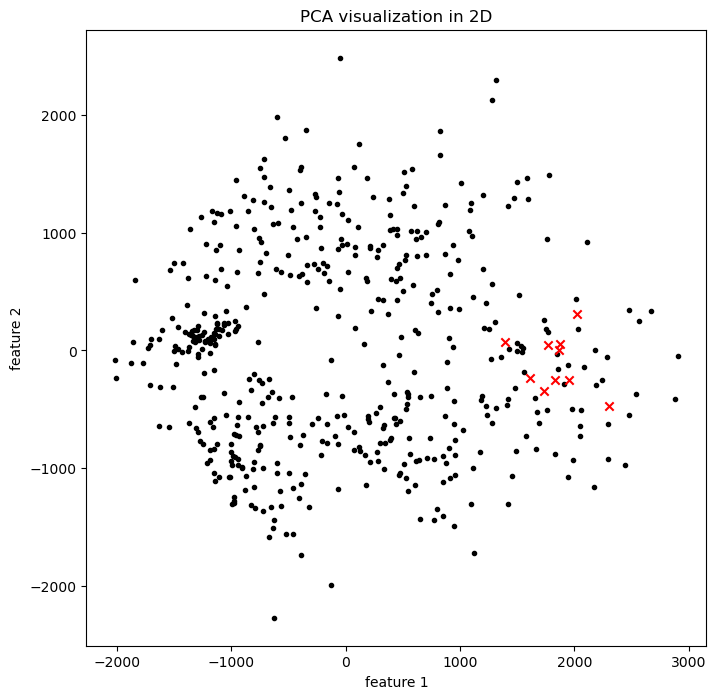

In [10]:
feat_plot2d(de_feat)

## can easily distinguish me and training data

In [11]:
# get 500 index randomly
ran_num = 500
train_set = random.sample(train_img,ran_num)

# get 10 index randomly in my photos
ran_num = 10
me_set = random.sample(me_img,ran_num)

# generate feature matrix
feature = np.zeros([len(train_set)+len(me_set),1024])
for i in range(0,len(train_set)):
    sample = train_set[i]
    img = np.array(sample.img)
    img = img.reshape(1,-1)
    feature[i,:] = img

for i in range(0,len(me_set)):
    sample = me_set[i]
    img = np.array(sample.img)
    img = img.reshape(1,-1)
    feature[i+len(train_set),:] = img


In [12]:
# PCA
# number of dimention
num_di = 3
de_feat,eigenfaces = pca(feature,num_di)
de_feat = de_feat.real

In [15]:
def feat_plot3d(de_feat):
    fig = plt.figure( figsize=(5,5) )
    ax = Axes3D(fig)
    ax.scatter(de_feat[0:500,0],de_feat[0:500,1],de_feat[0:500,2],c = 'k',marker = '.')
    ax.scatter(de_feat[500:,0],de_feat[500:,1],de_feat[500:,2],c = 'r',marker = 'x')
    ax.set_xlabel("feature 1")
    ax.set_ylabel("feature 2")
    ax.set_zlabel("feature 3")
    ax.set_title("PCA visualization in 3D")
    plt.show()

/var/folders/l5/222hwgzd5nz4v415zl9k5_5w0000gn/T/ipykernel_97694/2037911832.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


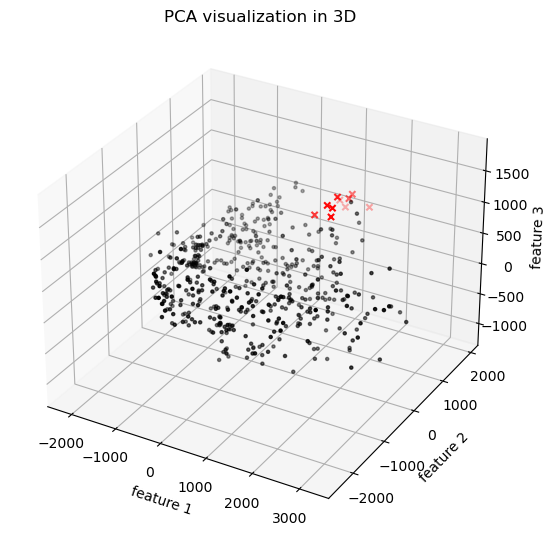

In [16]:
feat_plot3d(de_feat)

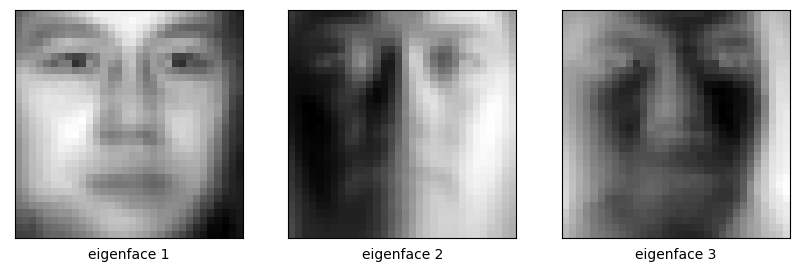

In [25]:
eigenfaces = eigenfaces.real
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(eigenfaces[:,0].reshape(32,32),'gray')
plt.xlabel('eigenface 1')
plt.subplot(1,3,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(eigenfaces[:,1].reshape(32,32),'gray')
plt.xlabel('eigenface 2')
plt.subplot(1,3,3)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(eigenfaces[:,2].reshape(32,32),'gray')
plt.xlabel('eigenface 3')
plt.show()